In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torchvision
%matplotlib inline

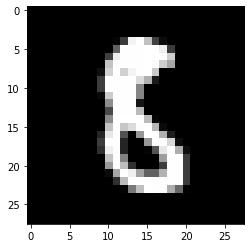

In [2]:
trainset = torchvision.datasets.MNIST(root = '', train = True, download=True);
num_classes = len(trainset.classes)
idx = np.random.randint(trainset.data.shape[0])
plt.imshow(trainset.data[idx], cmap = "gray")

In [0]:
class mnistModel(nn.Module):
    def __init__(self, feature_size):
        super(mnistModel, self).__init__()
        self.fc1 = nn.Linear(in_features=feature_size ,out_features = 128)
        self.fc2 = nn.Linear(in_features=128 ,out_features = 64)                              
        self.fc3 = nn.Linear(in_features=64 ,out_features = 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        y = torch.sigmoid(x)
        return y

In [4]:
random_img = trainset.data[idx]/255.
h ,w = random_img.size()
model = mnistModel (h*w)
t =random_img[:, : ,np.newaxis]
t = t.permute([2,0,1])
model(t)

tensor([[0.5334, 0.4936, 0.4862, 0.4981, 0.5091, 0.4819, 0.5239, 0.5117, 0.5177,
         0.4742]], grad_fn=<SigmoidBackward>)

In [0]:
class LeNet(nn.Module): 
    #dim_after_conv = input_size -(filter_zise - 1)
    #dim_after_max_pool = input_size /2 

    # size of input image :  28x28x1

    # after first conv2d : 28 - (5 -1) = 24
    # img size : 24x24x6

    # after max_pool :24/2 = 12
    # img size = 12x12x6

    #after 2nd comv2d : 12 - (5-1) = 8
    #img size : 8x8x16

    # after max_pool :8/2= 4
    # img size = 4x4x16

    def __init__(self):
        super(LeNet ,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16*4*4 ,out_features = 120)
        self.fc2 = nn.Linear(in_features=120 ,out_features = 84)                              
        self.fc3 = nn.Linear(in_features=84 ,out_features = 10)

    def forward(self, x):
        x = self.conv1(x)
    
        x = F.relu(x)
        x = F.max_pool2d(x ,2)

        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.relu(x)

        x = self.fc2(x)
        x = F.relu(x)

        x = self.fc3(x)
        x = F.relu(x)
        x = F.softmax(x,dim = 1)
        return x

In [6]:
conv_img = random_img[np.newaxis , np.newaxis , :]
conv_img.shape
lene = LeNet()
lene(conv_img)

tensor([[0.0998, 0.1019, 0.0998, 0.0998, 0.0998, 0.0998, 0.0998, 0.0998, 0.0998,
         0.0998]], grad_fn=<SoftmaxBackward>)